# Data Audit: Transformed Datasets

This notebook performs a data audit of the transformed datasets produced by the pipeline.
It inspects: `artifacts/transformed_data.csv`, `artifacts/transformed_train_data.csv`, and `artifacts/transformed_test_data.csv`.

Outputs: counts, missing values, duplicates, class distribution, text length stats, and sample positive/negative examples.


In [ ]:
# Setup imports and paths
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

sns.set(style="whitegrid")

BASE_DIR = os.path.abspath(os.getcwd())
# Artifacts directory in the repository root
ARTIFACTS_DIR = os.path.join(BASE_DIR, 'artifacts')
print('Repository BASE_DIR:', BASE_DIR)
print('Artifacts directory:', ARTIFACTS_DIR, 'exists=', os.path.exists(ARTIFACTS_DIR))
# Build default candidate paths (absolute) under artifacts/ — this is the common project layout
default_artifacts_paths = {
    'full': os.path.join(ARTIFACTS_DIR, 'transformed_data.csv'),
    'train': os.path.join(ARTIFACTS_DIR, 'transformed_train_data.csv'),
    'test': os.path.join(ARTIFACTS_DIR, 'transformed_test_data.csv'),
}
# Also accept a raw_data.csv at repo root if present
root_raw = os.path.join(BASE_DIR, 'raw_data.csv')
# Initialize PATHS preferring repo-root raw_data.csv, otherwise artifact outputs
if os.path.exists(root_raw):
    print('Found repo-root raw_data.csv — using as full dataset')
    PATHS = { 'full': root_raw, 'train': default_artifacts_paths['train'], 'test': default_artifacts_paths['test'] }
else:
    PATHS = default_artifacts_paths.copy()

def ensure_paths(paths_dict):
    # Ensure each path exists; if not, search the artifacts dir for a matching basename
    for key, p in list(paths_dict.items()):
        if not os.path.exists(p):
            # try fallback to artifacts dir with same basename
            candidate = os.path.join(ARTIFACTS_DIR, os.path.basename(p))
            if os.path.exists(candidate):
                print(f'Auto-correcting PATHS[{key}] -> {candidate}')
                paths_dict[key] = candidate
            else:
                print(f'PATHS[{key}] not found at {p} or {candidate}')
    return paths_dict

# Resolve and show final PATHS
PATHS = ensure_paths(PATHS)
print('Final PATHS and existence:')
for k,v in PATHS.items():
    print(k, ':', v, '-> exists=', os.path.exists(v))

def safe_read(path):
    # Accept absolute or relative paths; resolve relative paths from BASE_DIR
    p = path if os.path.isabs(path) else os.path.join(BASE_DIR, path)
    if not os.path.exists(p):
        print(f'File not found: {p}')
        return None
    try:
        df = pd.read_csv(p)
        print(f'Loaded {p} with shape {df.shape}')
        return df
    except Exception as e:
        print(f'Error reading {p}: {e}')
        return None

# Optional helper: copy a root-level dataset into artifacts/ for reproducibility
def copy_root_to_artifacts(root_path, artifacts_relpath=os.path.join('artifacts','raw_data.csv')):
    if not os.path.exists(root_path):
        print('Root path does not exist:', root_path)
        return None
    dest = os.path.join(BASE_DIR, artifacts_relpath)
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    try:
        import shutil
        shutil.copy(root_path, dest)
        print(f'Copied {root_path} -> {dest}')
        return dest
    except Exception as e:
        print('Copy failed:', e)
        return None


CSV files in repo root: []


In [13]:
# Load datasets (gracefully)
df_full = safe_read(PATHS['full'])
df_train = safe_read(PATHS['train'])
df_test = safe_read(PATHS['test'])


File not found: c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks\artifacts\transformed_data.csv
File not found: c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks\artifacts\transformed_train_data.csv
File not found: c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks\artifacts\transformed_test_data.csv


In [11]:
# Diagnostics for missing files in artifacts (run this cell to see what's missing)
print("CURRENT WORKING DIR:", os.getcwd())
print("BASE_DIR:", BASE_DIR)
print("Artifacts folder (relative):", artifacts_folder)
abs_artifacts = os.path.abspath(artifacts_folder)
print("Artifacts folder (absolute):", abs_artifacts)
print("Artifacts exists:", os.path.exists(artifacts_folder))
print()

if os.path.exists(artifacts_folder):
    files = os.listdir(artifacts_folder)
    print("Files in artifacts folder:")
    for f in files:
        print(" ", f)
    print()
    csvs = [f for f in files if f.lower().endswith('.csv')]
    print("CSV files found:", csvs or "None")
else:
    print("Artifacts folder not found. Ensure the project root is the current working directory or create the folder.")
    print("You can create it with: os.makedirs(artifacts_folder, exist_ok=True)")
print()

# Check each expected PATHS entry and show absolute path + existence
for key, relpath in PATHS.items():
    abs_path = os.path.abspath(relpath)
    exists = os.path.exists(relpath)
    print(f"{key}: '{relpath}' -> '{abs_path}' | exists: {exists}")
    if not exists:
        print(f"  -> Suggestion: place the CSV at the absolute path above or update PATHS['{key}'] to the correct location.")
print()

# Optional: create minimal sample CSVs to allow the notebook to continue (disabled by default)
create_sample_files = False  # set to True to create simple placeholder CSVs (won't overwrite existing files)
if create_sample_files:
    sample_df = pd.DataFrame({
        "review_text": ["This product is great!", "Terrible experience, do not buy."],
        "sentiment_label": ["positive", "negative"]
    })
    for key, relpath in PATHS.items():
        if not os.path.exists(relpath):
            os.makedirs(os.path.dirname(relpath) or ".", exist_ok=True)
            sample_df.to_csv(relpath, index=False)
            print(f"Created sample CSV for '{key}' at: {os.path.abspath(relpath)}")

CURRENT WORKING DIR: c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks
BASE_DIR: c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks
Artifacts folder (relative): artifacts
Artifacts folder (absolute): c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks\artifacts
Artifacts exists: False

Artifacts folder not found. Ensure the project root is the current working directory or create the folder.
You can create it with: os.makedirs(artifacts_folder, exist_ok=True)

full: 'artifacts\transformed_data.csv' -> 'c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks\artifacts\transformed_data.csv' | exists: False
  -> Suggestion: place the CSV at the absolute path above or update PATHS['full'] to the correct location.
train: 'artifacts\transformed_train_data.csv' -> 'c:\Users\muham\Desktop\Web Scraping + Sentiment Analysis\Notebooks\artifacts\transformed_train_data.csv' | exists: False
  -> Suggestion: place the CSV at the absolute path 

In [5]:
def simple_tokenize(text, top_n=20):
    if not isinstance(text, str):
        return []
    # simple cleaning and splitting
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return [w for w, _ in Counter(tokens).most_common(top_n)]


def audit_df(df, name='df'):
    print('\n' + '='*80)
    print(f'Audit: {name}')
    if df is None:
        print('DataFrame is None - skipping')
        return {}
    results = {}
    # rows/cols
    rows, cols = df.shape
    print(f'Rows: {rows} | Columns: {cols}')
    results['rows'] = int(rows)
    results['cols'] = int(cols)
    # dtypes
    print('\nColumn dtypes:')
    print(df.dtypes)
    results['dtypes'] = df.dtypes.apply(lambda x: str(x)).to_dict()
    # missing values
    miss = df.isnull().sum()
    miss_pct = (miss / rows * 100).round(2)
    miss_table = pd.concat([miss, miss_pct], axis=1)
    miss_table.columns = ['missing_count', 'missing_pct']
    print('\nMissing values (count, %):')
    print(miss_table[miss_table['missing_count']>0])
    results['missing'] = miss_table.to_dict()
    # duplicates
    dup_count = df.duplicated().sum()
    print(f'\nDuplicate rows: {dup_count}')
    results['duplicates'] = int(dup_count)
    if dup_count>0:
        print('\nExample duplicates:')
        display(df[df.duplicated(keep=False)].head(5))
    # sentiment label distribution if present
    if 'sentiment_label' in df.columns:
        vc = df['sentiment_label'].value_counts(dropna=False)
        pct = (vc / rows * 100).round(2)
        dist = pd.concat([vc, pct], axis=1)
        dist.columns = ['count', 'pct']
        print('\nSentiment label distribution:')
        print(dist)
        results['sentiment_dist'] = dist.to_dict()
    else:
        print('\nNo sentiment_label column found')
    # review_text stats
    if 'review_text' in df.columns:
        text_ser = df['review_text'].dropna().astype(str)
        lens = text_ser.str.len()
        print('\nText field stats:')
        print(f'Non-null texts: {len(text_ser)}')
        print(f'Average length: {lens.mean():.2f} | min: {lens.min()} | max: {lens.max()}')
        print('Quantiles:')
        print(lens.quantile([0.25,0.5,0.75]).to_dict())
        results['text_len'] = {'mean': float(lens.mean()), 'min': int(lens.min()), 'max': int(lens.max()), 'quantiles': lens.quantile([0.25,0.5,0.75]).to_dict()}
        # histogram
        plt.figure(figsize=(8,4))
        sns.histplot(lens, bins=50, kde=False)
        plt.title(f'Text length distribution: {name}')
        plt.xlabel('length')
        plt.show()
        # top words
        try:
            all_text = ' '.join(text_ser.str.lower().tolist())
            all_text = all_text.translate(str.maketrans('', '', string.punctuation))
            top_words = Counter(all_text.split()).most_common(20)
            print('\nTop 20 words:')
            print(top_words)
            results['top_words'] = top_words
        except Exception as e:
            print('Error computing top words:', e)
    else:
        print('\nNo review_text column found')
    return results



Audit: full
DataFrame is None - skipping

Audit: train
DataFrame is None - skipping

Audit: test
DataFrame is None - skipping


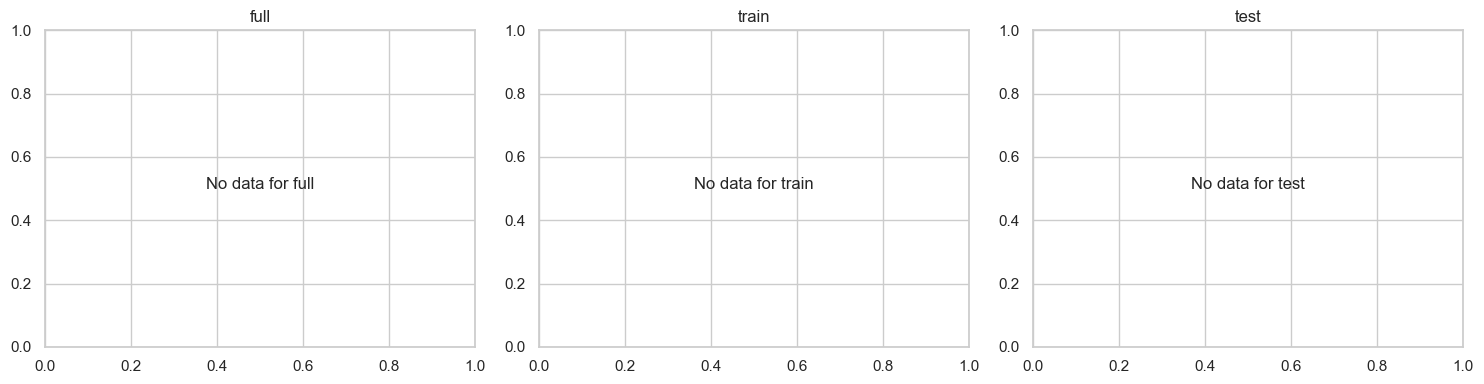

Could not save summary: [Errno 2] No such file or directory: 'artifacts\\data_audit_summary.json'


In [6]:
# Run audit for available datasets and collect summaries
summaries = {}
for key, df in [('full', df_full), ('train', df_train), ('test', df_test)]:
    summaries[key] = audit_df(df, name=key)

# Side-by-side class distribution if available
try:
    fig, axes = plt.subplots(1,3, figsize=(15,4))
    for ax, key in zip(axes, ['full','train','test']):
        df = {'full':df_full,'train':df_train,'test':df_test}[key]
        if df is None or 'sentiment_label' not in df.columns:
            ax.text(0.5,0.5,f'No data for {key}', ha='center')
            ax.set_title(key)
            continue
        vc = df['sentiment_label'].value_counts()
        sns.barplot(x=vc.index, y=vc.values, ax=ax)
        ax.set_title(f'{key} (n={len(df)})')
        ax.set_ylabel('count')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Error plotting distributions:', e)

# Save summary JSON to artifacts (optional)
try:
    import json
    out_path = os.path.join('artifacts','data_audit_summary.json')
    with open(out_path,'w', encoding='utf-8') as f:
        json.dump(summaries, f, indent=2)
    print(f'Saved audit summary to {out_path}')
except Exception as e:
    print('Could not save summary:', e)


In [ ]:
# Show sample positive and negative examples (with cleaned text if available)
try:
    from src.components.data_transformation import clean_text_pipeline
    CLEAN_AVAILABLE = True
except Exception:
    CLEAN_AVAILABLE = False

def show_samples(df, label, n=10):
    if df is None or 'sentiment_label' not in df.columns:
        print(f'No labeled data to sample for {label}')
        return
    subset = df[df['sentiment_label']==label].sample(min(n, len(df[df['sentiment_label']==label])))
    display_cols = ['review_text']
    if CLEAN_AVAILABLE:
        subset = subset.copy()
        subset['review_text_cleaned'] = subset['review_text'].apply(lambda x: clean_text_pipeline(x, keep_simple_html=False) if isinstance(x, str) else x)
        display_cols.append('review_text_cleaned')
    display(subset[display_cols])

show_samples(df_full, 'positive', n=10)
show_samples(df_full, 'negative', n=10)


## Findings & Recommendations

- Class balance: (see class distribution plots above). If neutral class dominates, consider stratified sampling, class weights, or downsampling neutrals.
- Missing values: Remove or impute records with missing `review_text`.
- Duplicates: Remove duplicates if they are exact duplicates from scraping errors.
- Label quality: Current labels are derived from VADER — consider a small manual QA set to measure noise and correct labels where necessary.
- Next steps: build baseline supervised models (Logistic Regression) and evaluate vs VADER; consider adding human-labeled validation set for reliable evaluation.
